### Treść zadania

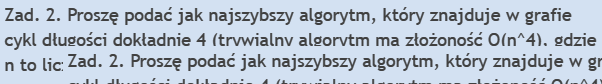

# Algorytmy bez użycia DFS ani BFS

### Omówienie algorytmu

###### Omówienie implementacji #1:
W pierwszej kolejności tworzymy nową reprezentację grafu, w postaci list sąsiedztwa. Pozwoli nam to osiągnąć docelową złożoność $ O(V^2) $, co wyjaśnię później. Zmniejsza to też oczywiście liczbę koniecznych operacji, ponieważ nie musimy sprawdzać, czy jest krawędź między każdą parą wierzchołków. W następnym kroku tworzymy macierz kwadratową o rozmiarze $ V \times V $, gdzie $ V $ jest liczbą wierzchołków w grafie. Macierz ta posłuży nam do zapamiętywania sąsiadów dla każdej pary wierzchołków $ v $, $ w $, gdzie wierzchołkowi $ v $ będą odpowiadały wiersze macierzy, a $ w $ - kolumny. Algorytm polega na tym, że przechodzimy główną pętlą przez wszystkie wierzchołki $ u $ grafu, a następnie dla każdego takiego wierzchołka, przechodzimy przez wszystkie możliwe pary jego sąsiadów (brzmi to jak $ O(V^3) $, ale nie jest), trzymając się takiej zasady, że zawsze $ w < v $. Dla każdej takiej trójki wierzchołków możemy zapisać wierzchołek $ u $ w macierzy $ C $, którą utworzyliśmy, na polu $ C[v][w] $ wierzchołek $ u $, co będzie oznaczać, że pomiędzy wierzchołkami $ v $ oraz $ w $ znajduje się wierzchołek $ u $. Natomiast, jeżeli już wcześniej dla danej pary wierzchołków był zapisany wierzchołek $ u $, oznacza to, że znaleźliśmy inny wierzchołek (mamy pewność, że jest inny, bo $ u $ rośnie z każdą iteracją głównej pętli), który znajduje się między parą wierzchołków $ v $ i $ w $, a więc mamy już 2 różne wierzchołki, będące wspólnymi sąsiadami wierzchołków $ v $ i $ w $, a więc mamy cykl długości 4.
<br>
- Dlaczego algorytm działa w czasie $ O(V^2) $? <br>

Spójrzmy na wewnętrzną pętlę:

    for j in range(i):
        v = G2[u][i]
        w = G2[u][j]
        if C[v][w] < 0: 
            C[w][v] = u
        else:
            return (v, C[v][w], w, u)

Łatwo możemy zauważyć, że w każdej iteracji (tj, dla każdego wierzchołka $ w $, będącego sąsiadem wierzchołka $ u $), wypełniamy tablicę kwadratową $ C $, jeżeli nie ma na danym polu jeszcze wartości lub zwracamy znaleziony cykl, gdy taka wartość już występuje. Oznacza to, że nawet, jeżeli ta pętla zadziała więcej niż raz, to zostanie wypełniona większa część macierzy kwadratowej, a więc zewnętrzne pętle zostaną wykonane mniej razy, ponieważ szybciej znajdzie się taka para wierzchołków $ v $ i $ w $, dla której już wcześniej zapisaliśmy wspólnego sąsiada. W skrócie, wewnętrzna pętla zawsze coś robi, za każdym razem wypełnia jakąś wartość tablicy $ C $, a wypełnić może maksymalnie tyle, ile jest komórek w tej tablicy, czyli $ O(V^2) $. Oczywiście jest to pesymistyczny scenariusz i w większości przypadków, jeżeli cykl istnieje, zostanie on znaleziony szybciej.
<br>
- Dlaczego nie działa reprezentacja macierzowa w $ O(V^2) $?

Powodem jest to, że w reprezentacji macierzowej grafu musimy zawsze jeszcze sprawdzić, czy rzeczywiście istnieje krawędź między parą wierzchołków. W takiej sytuacji wewnętrzna pętla (opisana wyżej) nie zawsze by wypełniała tablicę $ C $, a jedynie mogłaby przejść przez kilka wierzchołków $ w $ takich, że nie ma krawiędzi między $ u $ a $ w $.

### Złożoność

##### Dla implementacji #1:
###### Obliczeniowa:
$ O(V^2) $ - gdzie $ V $ jest liczbą wierzchołków w grafie,
###### Pamięciowa:
$ O(V^2) $ - gdzie $ V $ jest liczbą wierzchołków w grafie,
##### Dla implementacji #2:
###### Obliczeniowa:
$ O(V^3) $ - gdzie $ V $ jest liczbą wierzchołków w grafie,
###### Pamięciowa:
$ O(1) $ - gdzie $ V $ jest liczbą wierzchołków w grafie,

### Implementacja #1
##### Dla macierzowej reprezentacji grafu

In [1]:
def find_C4(G):
    n = len(G)
    # Create adjacency lists representation of such a graph
    G2 = [[] for _ in range(n)]
    for u in range(n):
        for v in range(n):
            if G[u][v]: G2[u].append(v)
    
    # Create an array in which we will store common neighbours
    # for all the vertices u and v
    C = [[-1] * n for _ in range(n)]
    
    # Loop over all possible vertices
    for u in range(n):
        # Loop over the first neighbour of the vertex
        for i in range(1, len(G2[u])):
            # Loop over the second neighbour of the vertex
            # (This neighbour will always have lower index than the first one
            # in order not to check the same neighbours pairs more than once)
            for j in range(i):
                v = G2[u][i]
                w = G2[u][j]
                # If there was no previous common neighbour of such vertices v and w, 
                # we will store the current u vertex as their common neighbour
                if C[v][w] < 0: C[v][w] = u  # <-- we can use only 'C[v][w] = u' as in a matrix all vertices are sorted in an increasing order (for traditional list representation, we have to use 'C[v][w] = C[w][v] = u')
                # Otherwise, if we found another vertex which is a common neighbour
                # for the same pair of vertices (where v is always greater than w),
                # there must be a C4 cycle which contains both v and w vertices, their
                # currently found common neighbour u and the previous common neighbour
                # of such v, w vertices pair
                else:
                    # As u and C[v][w] are common neighbours of v and w vertices, we
                    # have to return a cycle where C[v][w] and u are between v and w
                    return (v, C[v][w], w, u)

    return ()  # If no cycle of length 4 was found, return an empty tuple


def undirected_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = 1
    return M

###### Kilka testów

My używamy takiego grafu, tylko, że w wersji bez krawędzi skierowanych:
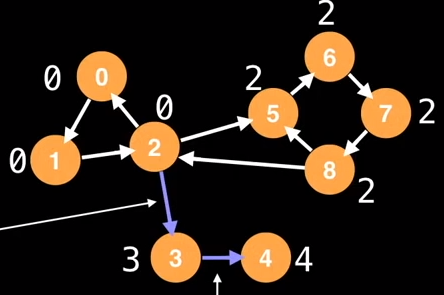

In [2]:
E = [
    (0, 1),
    (0, 2),
    (3, 1),
    (3, 2)
]
G = undirected_graph_matrix(E, 4)

print(*G, sep='\n')
print('C4:', find_C4(G))

[0, 1, 1, 0]
[1, 0, 0, 1]
[1, 0, 0, 1]
[0, 1, 1, 0]
C4: (3, 1, 0, 2)


In [3]:
E = [(0, 1), (0, 2), (2, 1), (2, 3), (3, 4), (2, 5), (5, 6), (8, 5), (8, 7), (6, 7), (2, 8)]
G = undirected_graph_matrix(E, 9)

print(*G, sep='\n')
print('C4:', find_C4(G))

[0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 1, 0, 0, 1]
[0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 0, 1, 0, 1, 0]
C4: (8, 5, 6, 7)


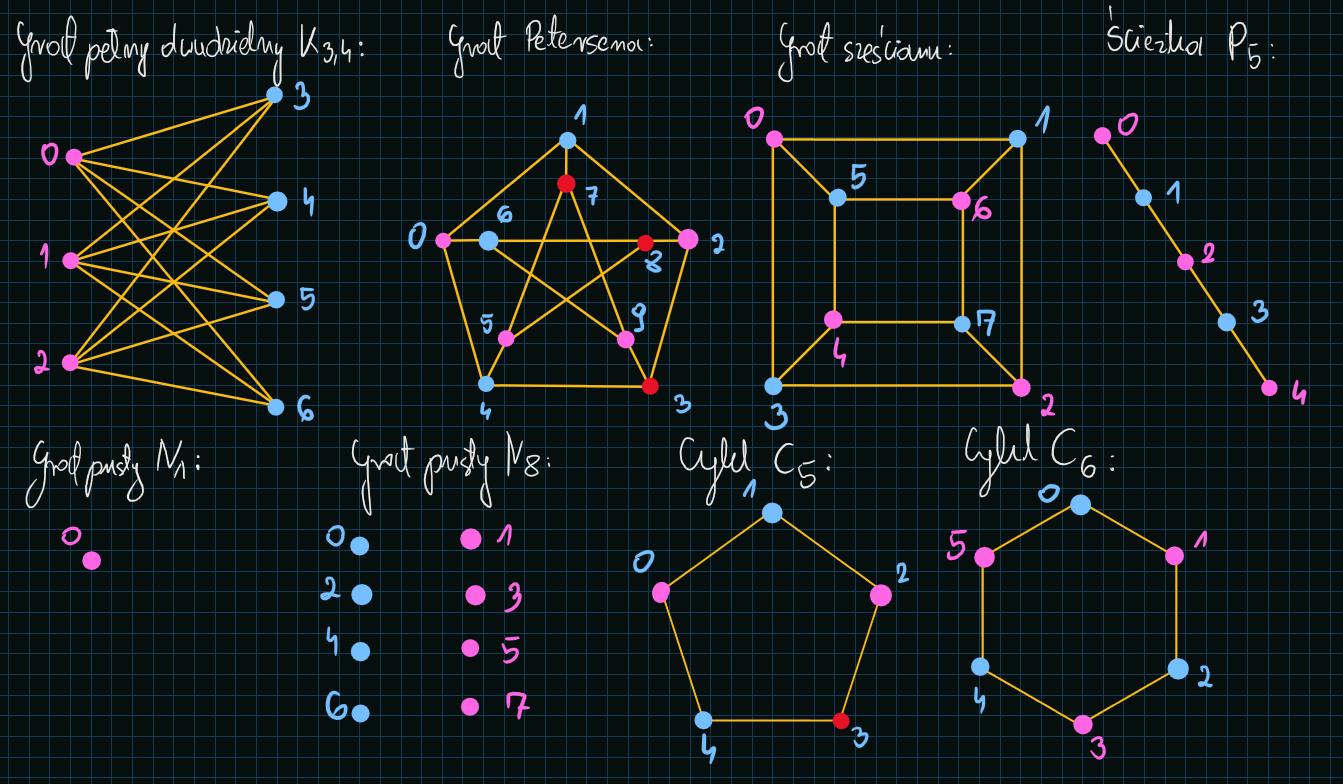

##### Pełny dwudzielny $ K_{3,4} $:

In [4]:
E = [(i, j) for i in range(3) for j in range(3, 7)]
G = undirected_graph_matrix(E, 7)

print(*G, sep='\n')
print('C4:', find_C4(G))

[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
C4: (4, 0, 3, 1)


##### Graf Petersena:

In [5]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_matrix(E, 10)

print(*G, sep='\n')
print('C4:', find_C4(G))

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
C4: ()


##### Graf sześcianu (kostka $ Q_3 $):

In [6]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]
G = undirected_graph_matrix(E, 8)

print(*G, sep='\n')
print('C4:', find_C4(G))

[0, 1, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 1, 0, 1, 0]
C4: (3, 0, 1, 2)


##### Ścieżka $ P_5 $:

In [7]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_matrix(E, 5)

print(*G, sep='\n')
print('C4:', find_C4(G))

[0, 1, 0, 0, 0]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[0, 0, 0, 1, 0]
C4: ()


##### Graf pusty $ N_1 $:

In [8]:
G = [[0]]  # No connections here (only one vertex)

print(*G, sep='\n')
print('C4:', find_C4(G))

[0]
C4: ()


##### Graf pusty $ N_8 $:

In [9]:
G = [[0] * 8 for _ in range(8)]  # No connections here (only one vertex)

print(*G, sep='\n')
print('C4:', find_C4(G))

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
C4: ()


##### Cykl $ C_5 $:

In [10]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_matrix(E, 5)

print(*G, sep='\n')
print('C4:', find_C4(G))

[0, 1, 0, 0, 1]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[1, 0, 0, 1, 0]
C4: ()


##### Cykl $ C_6 $:

In [11]:
E = [(i, (i + 1) % 6) for i in range(6)]
G = undirected_graph_matrix(E, 6)

print(*G, sep='\n')
print('C4:', find_C4(G))

[0, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 0, 0]
[0, 1, 0, 1, 0, 0]
[0, 0, 1, 0, 1, 0]
[0, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0]
C4: ()


##### Cykl $ C_4 $:

In [12]:
E = [(i, (i + 1) % 4) for i in range(4)]
G = undirected_graph_matrix(E, 4)

print(*G, sep='\n')
print('C4:', find_C4(G))

[0, 1, 0, 1]
[1, 0, 1, 0]
[0, 1, 0, 1]
[1, 0, 1, 0]
C4: (3, 0, 1, 2)


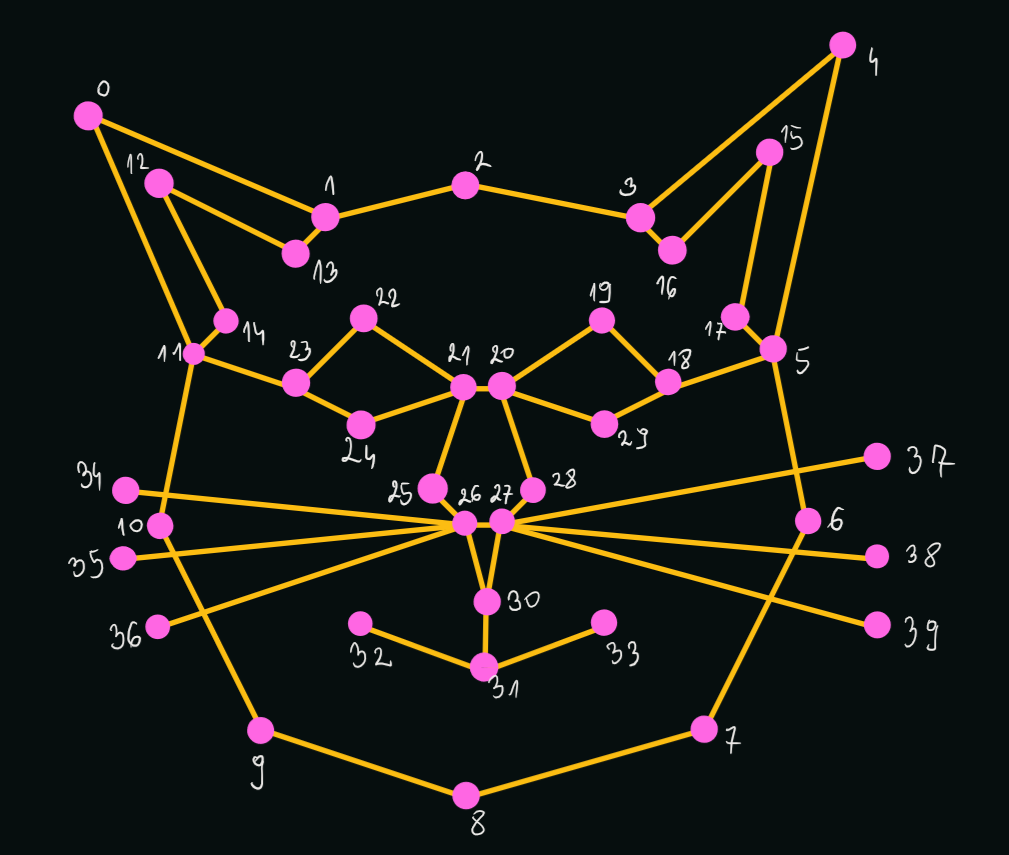

In [13]:
E = [*((i, i+1) for i in range(11)), (11, 0), (11, 14), (14, 12), (12, 13), (13, 1), (3, 16), (16, 15),
     (15, 17), (17, 5), (11, 23), (23, 22), (22, 21), (21, 24), (24, 23), (21, 20), (20, 19), (19, 18),
     (18, 29), (29, 20), (18, 5), (21, 25), (25, 26), (26, 27), (27, 28), (28, 20), (26, 30), (30, 27),
     (30, 31), (31, 32), (31, 33), (34, 26), (35, 26), (36, 26), (27, 37), (27, 38), (27, 39)]
n = len(set(v for edge in E for v in edge))

G = undirected_graph_matrix(E, n)
print('C4:', find_C4(G))

C4: (29, 18, 19, 20)


### Implementacja #1.1
##### Ten sam algorytm, co wyżej, ale działa dla reprezentacji listowej

Chodzi o to, że w powyższym algorytmie występował tylko warunek:

    if C[v][w] < 0: C[v][w] = u

Tutaj musimy jednak zapisywać sąsiada w obu symetrycznych względem głównej przekątnej macierzy polach, ponieważ nie mamy już pewności, że sąsiedzi danego wierzchołka są posortowani w sposób rosnący (a przekształcanie macierzy na listy sąsiedztwa już nam wymuszało taką kolejność):

    if C[v][w] < 0: C[v][w] = C[w][v] = u

Konieczna jest więc jedynie widoczna wyżej zmiana w kodzie.

In [14]:
def find_C4(G: 'graph represented by adjacency lists'):
    n = len(G)
    # Create an array in which we will store common neighbours
    # for all the vertices u and v
    C = [[-1] * n for _ in range(n)]
    
    # Loop over all possible vertices
    for u in range(n):
        # Loop over the first neighbour of the vertex
        for i in range(1, len(G[u])):
            # Loop over the second neighbour of the vertex
            # (This neighbour will always have lower index than the first one
            # in order not to check the same neighbours pairs more than once)
            for j in range(i):
                v = G[u][i]
                w = G[u][j]
                # If there was no previous common neighbour of such vertices v and w, 
                # we will store the current u vertex as their common neighbour
                if C[v][w] < 0: C[v][w] = C[w][v] = u
                # Otherwise, if we found another vertex which is a common neighbour
                # for the same pair of vertices (where v is always greater than w),
                # there must be a C4 cycle which contains both v and w vertices, their
                # currently found common neighbour u and the previous common neighbour
                # of such v, w vertices pair
                else:
                    # As u and C[v][w] are common neighbours of v and w vertices, we
                    # have to return a cycle where C[v][w] and u are between v and w
                    return (v, C[v][w], w, u)

    return ()  # If no cycle of length 4 was found, return an empty tuple


def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G

### Implementacja #2
##### Dla macierzowej reprezentacji grafu

In [15]:
# O(n^3)
# https://mathoverflow.net/questions/16393/finding-a-cycle-of-fixed-length
def find_C4(G: 'graph represented using adjacency matrix'):
    n = len(G)
    # Look for all vertices pairs (u and v)
    for u in range(1, n):
        for v in range(u):
            # Create a variable which will hold a vertex which is adjacent
            # to both u and v vertices
            prev = None
            # Loop over all possible vertices and look for a vertex which
            # is a neighbour to both u and v
            for w in range(n):
                if G[u][w] and G[v][w]:
                    # If found a desired vertex and there exist another vertex
                    # which is adjacent to u and v, return a cycle which was found
                    if prev: return (u, w, v, prev)
                    # Otherwise, store this vertex for later
                    prev = w
    return ()


def undirected_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = 1
    return M

Tu już obejdzie się tylko z jednym testem.

My używamy takiego grafu, tylko, że w wersji bez krawędzi skierowanych:
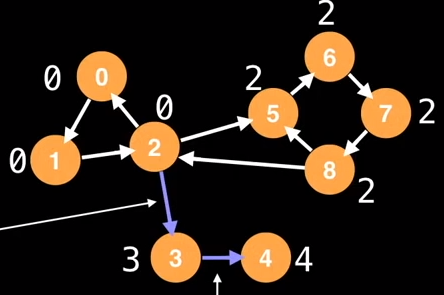

In [16]:
E = [(0, 1), (0, 2), (2, 1), (2, 3), (3, 4), (2, 5), (5, 6), (8, 5), (8, 7), (6, 7), (2, 8)]
G = undirected_graph_matrix(E, 9)

print(*G, sep='\n')
print('C4:', find_C4(G))

[0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 1, 0, 0, 1]
[0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 0, 1, 0, 1, 0]
C4: (7, 8, 5, 6)


# DFS i backtracking
#### (UWAGA: To podejście jest niewydajne, ponieważ sprawdza wszystkie ścieżki długości k, wychodzące z danego wierzchołka)

### Złożoność

###### Obliczeniowa:
$ O(V \cdot V^k) $ - gdzie $ V $ jest liczbą wierzchołków w grafie, (więc dla cykli długości 4 mamy złożoność $ O(V \cdot V^4) = O(V^5) $)
###### Pamięciowa:
$ O(V^2) $ - gdzie $ V $ jest liczbą wierzchołków w grafie,

### Implementacja

In [17]:
def find_cycle(G: 'graph represented using adjacency matrix', k: 'length of a cycle'):
    n = len(G)        
    visited = [False] * n
    # Create an array in which indices of subsequent vertices from a cycle will be stored
    cycle = [None] * k
    
    def dfs(i, c_idx):
        cycle[c_idx] = i
        
        # Check if we can connect the last vertex with the first one from a cycle
        if c_idx == k - 1:
            return True if G[i][cycle[0]] else False
        
        # Mark the current vertex as visited
        visited[i] = True
        
        # Look for the next vertex which can create a cycle
        for j in range(n):
            if G[i][j] and not visited[j] and dfs(j, c_idx + 1):
                # Return True as we found a desired cycle (this will ensure that no
                # more cycles will be searched)
                return True
        
        # Make a vertex unvisited to allow future visits
        visited[i] = False
        return False  # Return False as no cycle was found
    
    # Check every possible cycle beginning (except last k - 1 vertices as they must
    # be included in cycles checked before (if we search for a cycle of length k there is
    # no possibility that a cycle will have only vertices from a set of k - 1 last vertices))
    for i in range(n - k + 1):
        if dfs(i, 0): break
        # Mark a vertex as permanently visited as we already checked every cycle which may
        # contain this vertex (so we won't visit this vertex anymore)
        visited[i] = True
    # If a loop was finished without an execution of the break statement, return an empty
    # list as there was no cycle found (and a cycle array holds some garbage)
    else:
        return []
    
    return cycle


def undirected_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = 1
    return M

###### Kilka testów

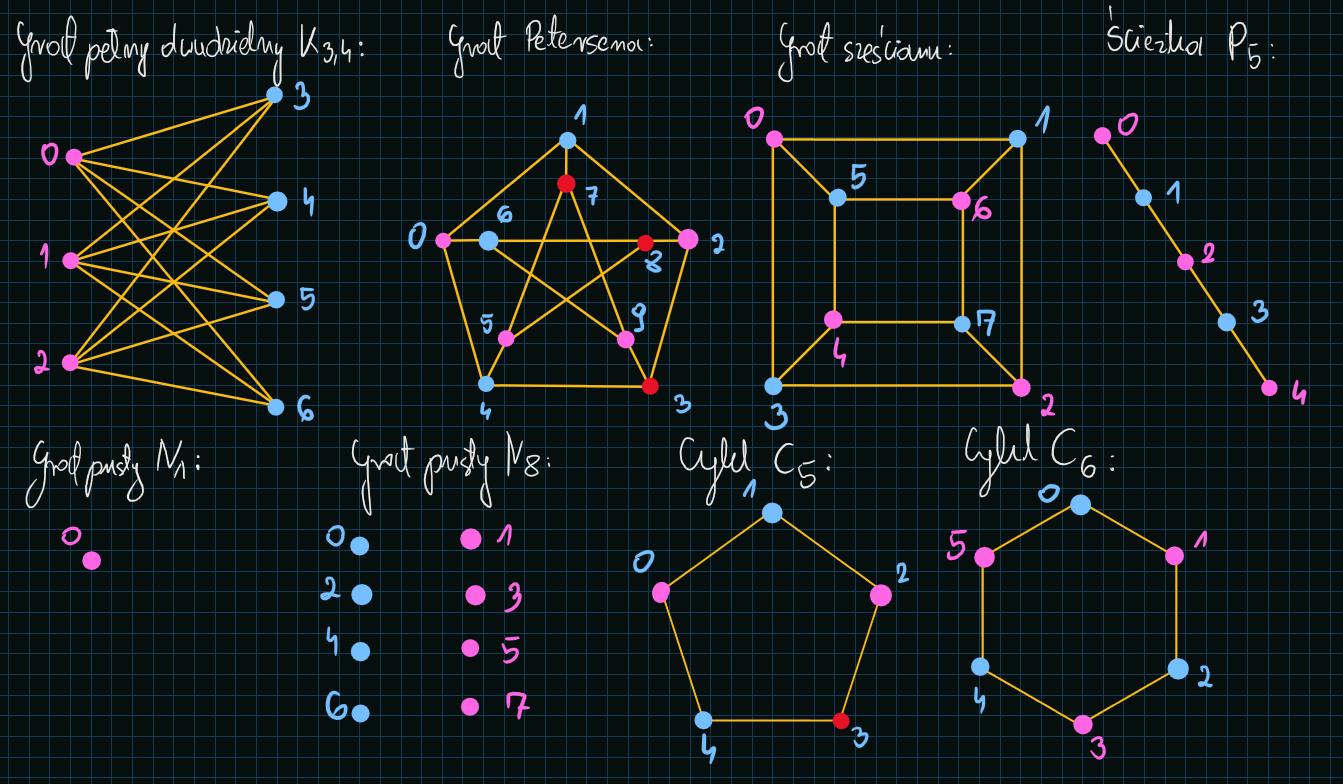

##### Pełny dwudzielny $ K_{3,4} $:

In [18]:
E = [(i, j) for i in range(3) for j in range(3, 7)]
G = undirected_graph_matrix(E, 7)
k = 4

print(*G, sep='\n')
print(find_cycle(G, k))

[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[0, 3, 1, 4]


##### Graf Petersena:

In [19]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_matrix(E, 10)
k = 5

print(*G, sep='\n')
print(find_cycle(G, k))

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
[0, 1, 2, 3, 4]


##### Graf sześcianu (kostka $ Q_3 $):

In [20]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]
G = undirected_graph_matrix(E, 8)

print(*G, sep='\n')
print(find_cycle(G, 4))
print(find_cycle(G, 6))
print(find_cycle(G, 8))

[0, 1, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 1, 0, 1, 0]
[0, 1, 2, 3]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 7, 6, 5]


##### Ścieżka $ P_5 $:

In [21]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_matrix(E, 5)

k = 1
print(*G, sep='\n')
print(find_cycle(G, k))

[0, 1, 0, 0, 0]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[0, 0, 0, 1, 0]
[]


##### Graf pusty $ N_1 $:

In [22]:
G = [[0]]  # No connections here (only one vertex)

k = 1
print(*G, sep='\n')
print(find_cycle(G, k))

[0]
[]


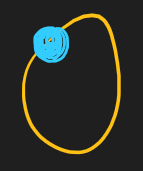

In [23]:
G = [[1]]

k = 1
print(*G, sep='\n')
print(find_cycle(G, k))

[1]
[0]


##### Graf pusty $ N_8 $:

In [24]:
G = [[0] * 8 for _ in range(8)]  # No connections here (only one vertex)

k = 1
print(*G, sep='\n')
print(find_cycle(G, k))

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[]


##### Cykl $ C_5 $:

In [25]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_matrix(E, 5)

k = 5
print(*G, sep='\n')
print(find_cycle(G, k))

[0, 1, 0, 0, 1]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[1, 0, 0, 1, 0]
[0, 1, 2, 3, 4]


### (Dodatkowo) Znajdowanie wszystkich cykli określonej długości w grafie

Algorytm bardzo podobny do powyższego. Modyfikacje dotyczą tylko tego, że nie przerywamy algorytmu po znalezieniu pierwszego cyklu i, że oznaczamy również krawędzie jako odwiedzone, po pierwszym przejsciu algorytmu DFS (ponieważ nie chcemy otrzymać duplikatów, tj. cykli, które składają się z tych samych wierzchołków, ale w odwrotnej kolejności - te same cykle). Wystarczy więc przy przejściu z wierzchołka startowego do dowolnego innego oznaczyć krawędź jako już odwiedzoną i nie odwiedzać jej więcej razy, ale przede wszystkim sprawdzić, czy po dojściu do ostatniego wierzchołka na danej ścieżce, możemy go połączyć z wierzchołkiem początkowym, a możemy to uczynić tylko wtedy, gdy istnieje krawędź między tymi wierzchołkami, która nie była wcześniej odwiedzana (bo dla niej znaleźliśmy już wszystkie cykle).

In [26]:
def find_cycles(G: 'graph represented using adjacency matrix', k: 'length of a cycle'):
    n = len(G)        
    visited = [False] * n
    # Create an array in which indices of subsequent vertices from a cycle will be stored
    cycle = [None] * k
    result = []  # An array to store all cycles found
    
    def dfs(i, c_idx):
        cycle[c_idx] = i
        
        # Check if we can connect the last vertex with the first one from a cycle
        if c_idx == k - 1:
            # We can connect the last vertex with the beginning only if there was
            # no cycle of the same vertices in an opposite direction
            if G[i][cycle[0]] == 1: result.append(cycle.copy())
            return
        
        # Mark the current vertex as visited
        visited[i] = True
        
        # Look for the next vertex which can create a cycle
        for j in range(n):
            if G[i][j] == 1 and not visited[j]:
                if c_idx == 0:
                    # Mark an edge as permanently visited (to prevent an algorithm from
                    # searching the same cycle in an opposite direction)
                    G[i][j] = G[j][i] = -1
                dfs(j, c_idx + 1)
        
        # Make a vertex unvisited to allow future visits
        visited[i] = False
        
    # Check every possible cycle beginning (except last k - 1 vertices as they must
    # be included in cycles checked before (if we search for a cycle of length k there is
    # no possibility that a cycle will have only vertices from a set of k - 1 last vertices))
    for i in range(n - k + 1):
        dfs(i, 0)
        # Mark a vertex as permanently visited as we already checked every cycle which may
        # contain this vertex (so we won't visit this vertex anymore)
        visited[i] = True
    
    # Fix a matrix (change -1 values back to ones)
    for i in range(n):
        for j in range(n):
            G[i][j] = abs(G[i][j])
            
    return result


def undirected_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = 1
    return M

###### Kilka testów

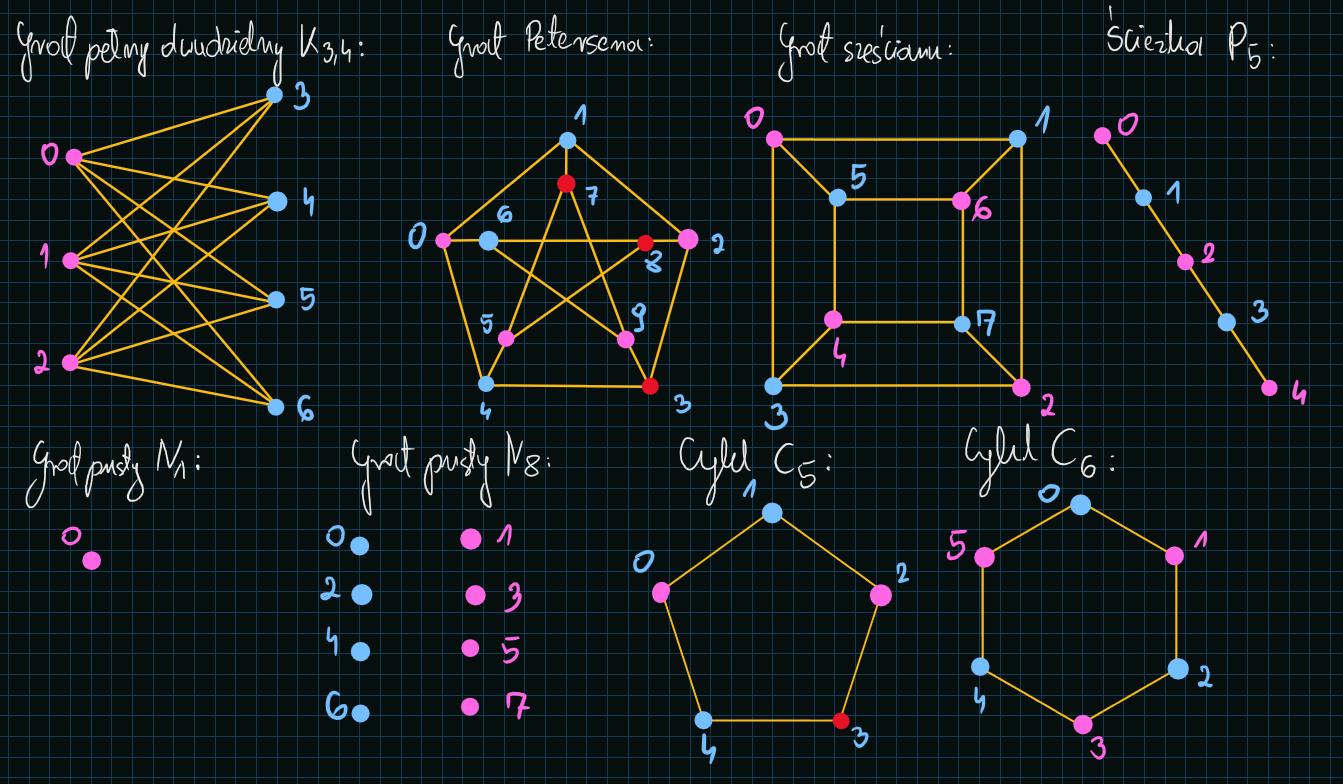

##### Pełny dwudzielny $ K_{3,4} $:

In [27]:
E = [(i, j) for i in range(3) for j in range(3, 7)]
G = undirected_graph_matrix(E, 7)
k = 4

print(*G, sep='\n')
print(f'All cycles of length {k}:', *find_cycles(G, k), sep='\n')

[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
All cycles of length 4:
[0, 3, 1, 4]
[0, 3, 1, 5]
[0, 3, 1, 6]
[0, 3, 2, 4]
[0, 3, 2, 5]
[0, 3, 2, 6]
[0, 4, 1, 5]
[0, 4, 1, 6]
[0, 4, 2, 5]
[0, 4, 2, 6]
[0, 5, 1, 6]
[0, 5, 2, 6]
[1, 3, 2, 4]
[1, 3, 2, 5]
[1, 3, 2, 6]
[1, 4, 2, 5]
[1, 4, 2, 6]
[1, 5, 2, 6]


##### Graf Petersena:

In [28]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_matrix(E, 10)
k = 5

print(*G, sep='\n')
print(f'All cycles of length {k}:', *find_cycles(G, k), sep='\n')

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
All cycles of length 5:
[0, 1, 2, 3, 4]
[0, 1, 2, 8, 6]
[0, 1, 7, 5, 4]
[0, 1, 7, 9, 6]
[0, 4, 3, 9, 6]
[0, 4, 5, 8, 6]
[1, 2, 3, 9, 7]
[1, 2, 8, 5, 7]
[2, 3, 4, 5, 8]
[2, 3, 9, 6, 8]
[3, 4, 5, 7, 9]
[5, 7, 9, 6, 8]


##### Graf sześcianu (kostka $ Q_3 $):

In [29]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]
G = undirected_graph_matrix(E, 8)

print(*G, sep='\n')
k = 4
print(f'All cycles of length {k}:', *find_cycles(G, k), sep='\n')
k = 6
print(f'All cycles of length {k}:', *find_cycles(G, k), sep='\n')
k = 8
print(f'All cycles of length {k}:', *find_cycles(G, k), sep='\n')

[0, 1, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 1, 0, 1, 0]
All cycles of length 4:
[0, 1, 2, 3]
[0, 1, 6, 5]
[0, 3, 4, 5]
[1, 2, 7, 6]
[2, 3, 4, 7]
[4, 5, 6, 7]
All cycles of length 6:
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 7, 4, 3]
[0, 1, 2, 7, 4, 5]
[0, 1, 2, 7, 6, 5]
[0, 1, 6, 5, 4, 3]
[0, 1, 6, 7, 2, 3]
[0, 1, 6, 7, 4, 3]
[0, 1, 6, 7, 4, 5]
[0, 3, 2, 1, 6, 5]
[0, 3, 2, 7, 4, 5]
[0, 3, 2, 7, 6, 5]
[0, 3, 4, 7, 6, 5]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 7, 6]
[1, 2, 7, 4, 5, 6]
[2, 3, 4, 5, 6, 7]
All cycles of length 8:
[0, 1, 2, 3, 4, 7, 6, 5]
[0, 1, 2, 7, 6, 5, 4, 3]
[0, 1, 6, 5, 4, 7, 2, 3]
[0, 1, 6, 7, 2, 3, 4, 5]
[0, 3, 2, 1, 6, 7, 4, 5]
[0, 3, 4, 7, 2, 1, 6, 5]


##### Ścieżka $ P_5 $:

In [30]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_matrix(E, 5)

k = 1
print(*G, sep='\n')
print(f'All cycles of length {k}:', *find_cycles(G, k), sep='\n')

[0, 1, 0, 0, 0]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[0, 0, 0, 1, 0]
All cycles of length 1:


##### Graf pusty $ N_1 $:

In [31]:
G = [[0]]  # No connections here (only one vertex)

k = 1
print(*G, sep='\n')
print(f'All cycles of length {k}:', *find_cycles(G, k), sep='\n')

[0]
All cycles of length 1:


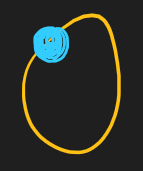

In [32]:
G = [[1]]

k = 1
print(*G, sep='\n')
print(f'All cycles of length {k}:', *find_cycles(G, k), sep='\n')

[1]
All cycles of length 1:
[0]


##### Graf pusty $ N_8 $:

In [33]:
G = [[0] * 8 for _ in range(8)]  # No connections here (only one vertex)

k = 1
print(*G, sep='\n')
print(f'All cycles of length {k}:', *find_cycles(G, k), sep='\n')

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
All cycles of length 1:


##### Cykl $ C_5 $:

In [34]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_matrix(E, 5)

k = 5
print(*G, sep='\n')
print(f'All cycles of length {k}:', *find_cycles(G, k), sep='\n')

[0, 1, 0, 0, 1]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[1, 0, 0, 1, 0]
All cycles of length 5:
[0, 1, 2, 3, 4]


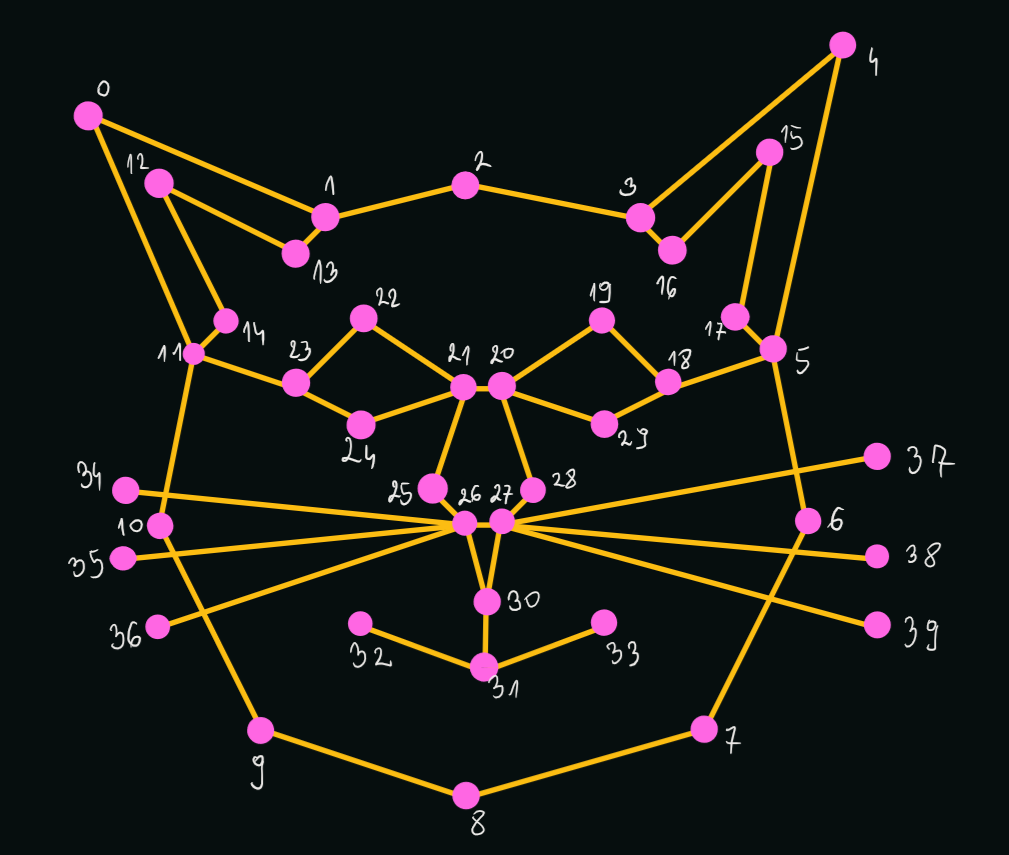

In [35]:
E = [*((i, i+1) for i in range(11)), (11, 0), (11, 14), (14, 12), (12, 13), (13, 1), (3, 16), (16, 15),
     (15, 17), (17, 5), (11, 23), (23, 22), (22, 21), (21, 24), (24, 23), (21, 20), (20, 19), (19, 18),
     (18, 29), (29, 20), (18, 5), (21, 25), (25, 26), (26, 27), (27, 28), (28, 20), (26, 30), (30, 27),
     (30, 31), (31, 32), (31, 33), (34, 26), (35, 26), (36, 26), (27, 37), (27, 38), (27, 39)]
n = len(set(v for edge in E for v in edge))

G = undirected_graph_matrix(E, n)
# print(*G, sep='\n')
for k in range(3, n + 1):
    print(f'Cycles of length {k}:')
    print(*find_cycles(G, k), sep='\n')

Cycles of length 3:
[26, 27, 30]
Cycles of length 4:
[18, 19, 20, 29]
[21, 22, 23, 24]
Cycles of length 5:

Cycles of length 6:
[0, 1, 13, 12, 14, 11]
[3, 4, 5, 17, 15, 16]
[20, 21, 25, 26, 27, 28]
Cycles of length 7:
[20, 21, 25, 26, 30, 27, 28]
Cycles of length 8:

Cycles of length 9:

Cycles of length 10:

Cycles of length 11:

Cycles of length 12:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Cycles of length 13:
[0, 1, 2, 3, 4, 5, 18, 19, 20, 21, 22, 23, 11]
[0, 1, 2, 3, 4, 5, 18, 19, 20, 21, 24, 23, 11]
[0, 1, 2, 3, 4, 5, 18, 29, 20, 21, 22, 23, 11]
[0, 1, 2, 3, 4, 5, 18, 29, 20, 21, 24, 23, 11]
[5, 6, 7, 8, 9, 10, 11, 23, 22, 21, 20, 19, 18]
[5, 6, 7, 8, 9, 10, 11, 23, 22, 21, 20, 29, 18]
[5, 6, 7, 8, 9, 10, 11, 23, 24, 21, 20, 19, 18]
[5, 6, 7, 8, 9, 10, 11, 23, 24, 21, 20, 29, 18]
Cycles of length 14:
[0, 1, 2, 3, 16, 15, 17, 5, 6, 7, 8, 9, 10, 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 12, 13]
Cycles of length 15:
[0, 1, 2, 3, 16, 15, 17, 5, 18, 19, 20, 21, 22, 23, 11]
[0, 1, 2, 3,

# Iteracyjne i $ O(n^3) $
### Znajdowanie wszystkich cykli C4 !!!
#### (Tylko dla cykli C4)

Trochę lepsze podejście poniżej. ($ O(n^3) $) <br>
Dokładniejsze wyjaśnienie <a href="../../../Pozostałe zadania/Zadania BIT Algo/9. Zajęcia/Zadanie dodatkowe 1. (Wszystkie C4 w grafie nieskierowanym).ipynb">TUTAJ</a>

###### UWAGA:
Algorytm ten jest bardzo dobrym algorytmem do znajdowania wszystkich cykli długości 4.

### Omówienie algorytmu

<div>
    <video src="../../../Pozostałe zadania/Zadania BIT Algo/video/BIT_spotkanie9_zadanie_dodatkowe1.mp4" controls style="width: 100%; height: 100%; padding: 0; margin: 0 auto;"></video>
</div>


### Złożoność

###### Obliczeniowa:
$ O(V \cdot V^2) = O(V^3) $ - gdzie $ V $ jest liczbą wierzchołków w grafie,

### Implementacja

In [36]:
def find_all_C4(G: 'graph represented using adjacency matrix'):
    n = len(G)
    parents = [[] for _ in range(n)]
    marked  = [False] * n
    endpoints = []
    cycles = []
    
    for u in range(n):
        # Loop over all the unvisited neighbours
        for v in range(n):
            # Skip if there is no edge or a vertex v was processed before
            if not G[u][v] or v <= u: continue
            parents[v].append(u)
            # Loop over all their unvisited neighbours
            for w in range(n):
                # Skip if there is no edge, a vertex w was processed before or we
                # have a cycle of the length 3
                if not G[v][w] or w <= u or (parents[w] and parents[w][0] == u): continue
                parents[w].append(v)
                # Mark as an endpoint if has more than 1 parent
                if len(parents[w]) > 1 and not marked[w]: 
                    endpoints.append(w)
                    marked[w] = True
                    
#         print(parents, endpoints)

        # Now, as we created an array of parents, we can restore all 
        # the cycles starting from the endpoints (if there is any)
        for w in endpoints:
            # Get all the pairs of u - v vertices neighbours
            for i in range(1, len(parents[w])):
                for j in range(i):
                    cycles.append((u, parents[w][j], w, parents[w][i]))
            
        # Reset values for the next loop
        for i in range(n): parents[i].clear()
        for v in endpoints: marked[v] = False
        endpoints.clear()
            
    return cycles

###### Kilka testów

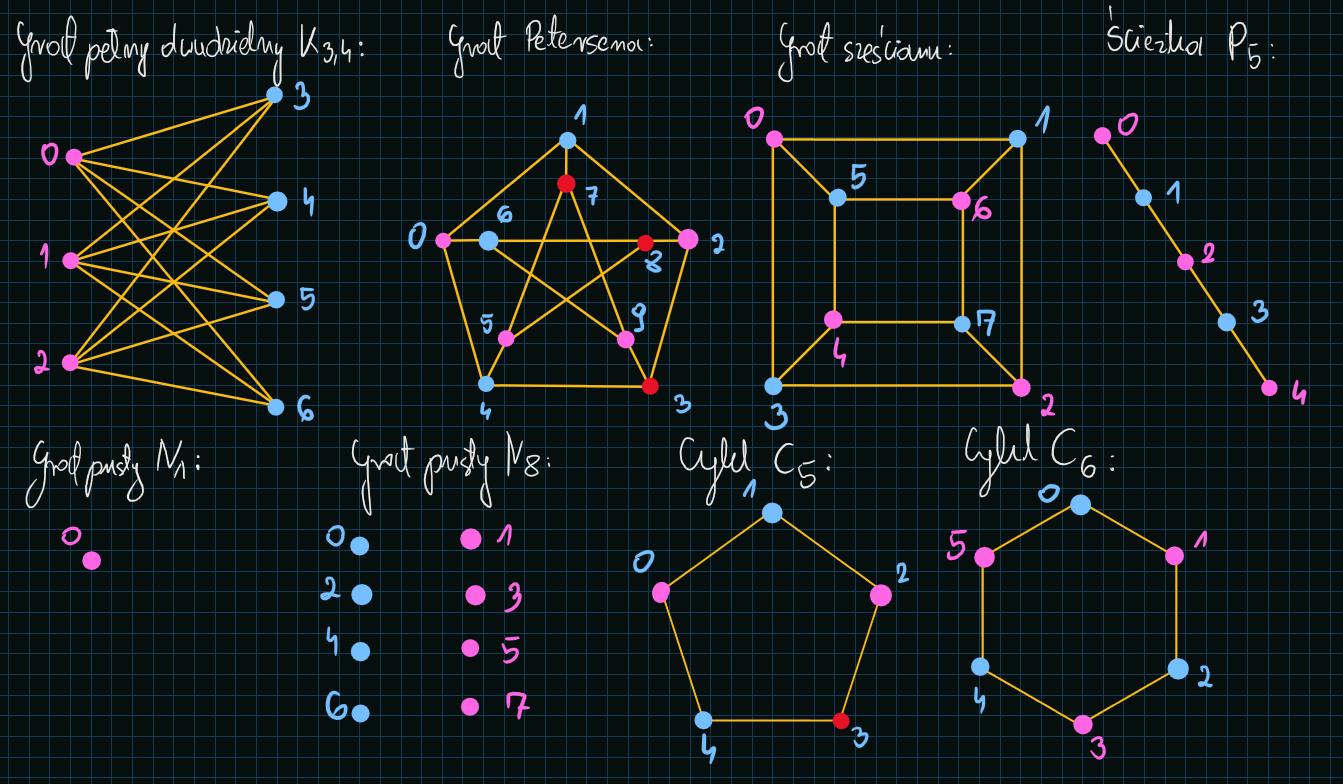

##### Pełny dwudzielny $ K_{3,4} $:

In [37]:
E = [(i, j) for i in range(3) for j in range(3, 7)]
G = undirected_graph_matrix(E, 7)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
All cycles of length 4:
(0, 3, 1, 4)
(0, 3, 1, 5)
(0, 4, 1, 5)
(0, 3, 1, 6)
(0, 4, 1, 6)
(0, 5, 1, 6)
(0, 3, 2, 4)
(0, 3, 2, 5)
(0, 4, 2, 5)
(0, 3, 2, 6)
(0, 4, 2, 6)
(0, 5, 2, 6)
(1, 3, 2, 4)
(1, 3, 2, 5)
(1, 4, 2, 5)
(1, 3, 2, 6)
(1, 4, 2, 6)
(1, 5, 2, 6)


##### Graf Petersena:

In [38]:
E = [(0, 1), (0, 6), (0, 4), (1, 7), (1, 2), (2, 8), (2, 3), (3, 4), 
     (3, 9), (4, 5), (6, 8), (8, 5), (5, 7), (7, 9), (9, 6)]
G = undirected_graph_matrix(E, 10)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
All cycles of length 4:


##### Graf sześcianu (kostka $ Q_3 $):

In [39]:
E = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 5), (5, 6), (6, 7), (7, 4), (0, 5), (1, 6), (2, 7), (3, 4)]
G = undirected_graph_matrix(E, 8)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 1, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 0, 1, 0]
[0, 1, 0, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 1, 0, 1, 0]
All cycles of length 4:
(0, 1, 2, 3)
(0, 3, 4, 5)
(0, 1, 6, 5)
(1, 2, 7, 6)
(2, 3, 4, 7)
(4, 5, 6, 7)


##### Ścieżka $ P_5 $:

In [40]:
E = [(i, i + 1) for i in range(4)]
G = undirected_graph_matrix(E, 5)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 1, 0, 0, 0]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[0, 0, 0, 1, 0]
All cycles of length 4:


##### Graf pusty $ N_1 $:

In [41]:
G = [[0]]  # No connections here (only one vertex)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0]
All cycles of length 4:


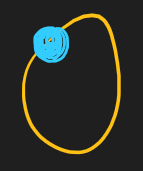

In [42]:
G = [[1]]

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[1]
All cycles of length 4:


##### Graf pusty $ N_8 $:

In [43]:
G = [[0] * 8 for _ in range(8)]  # No connections here (only one vertex)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
All cycles of length 4:


##### Cykl $ C_5 $:

In [44]:
E = [(i, (i + 1) % 5) for i in range(5)]
G = undirected_graph_matrix(E, 5)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 1, 0, 0, 1]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[1, 0, 0, 1, 0]
All cycles of length 4:


##### Cykl $ C_3 $:

In [45]:
E = [(i, (i + 1) % 3) for i in range(3)]
G = undirected_graph_matrix(E, 3)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 1, 1]
[1, 0, 1]
[1, 1, 0]
All cycles of length 4:


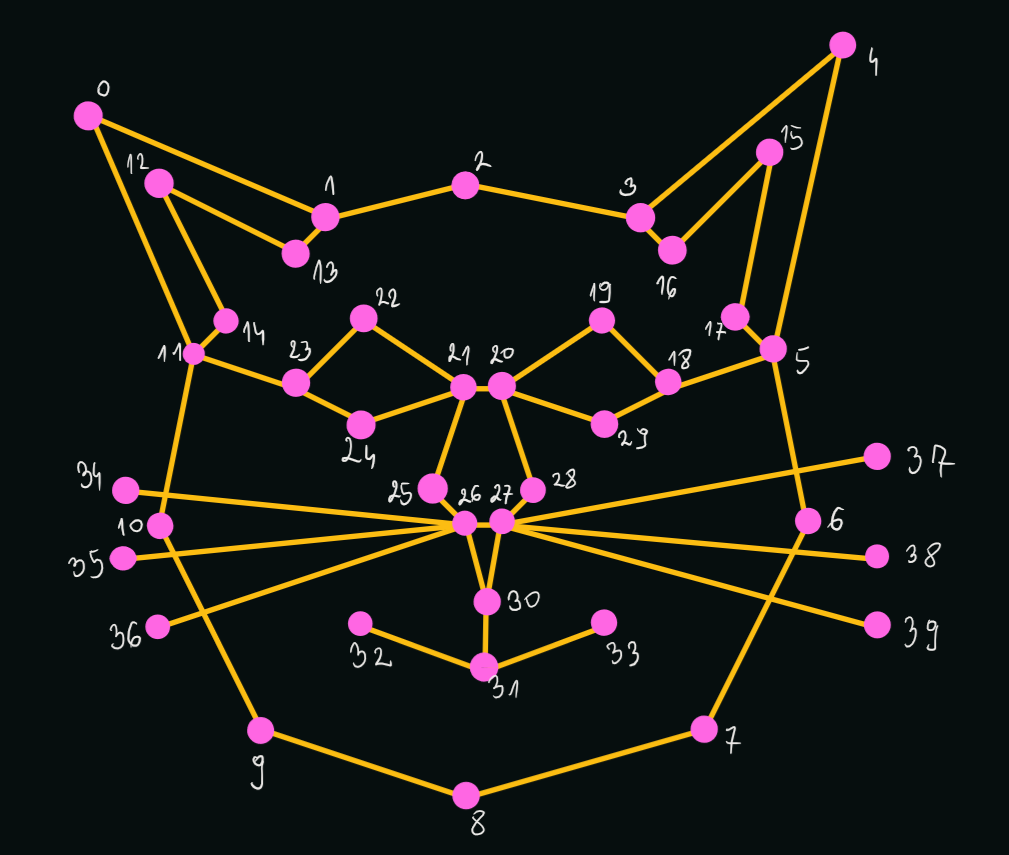

In [46]:
E = [*((i, i+1) for i in range(11)), (11, 0), (11, 14), (14, 12), (12, 13), (13, 1), (3, 16), (16, 15),
     (15, 17), (17, 5), (11, 23), (23, 22), (22, 21), (21, 24), (24, 23), (21, 20), (20, 19), (19, 18),
     (18, 29), (29, 20), (18, 5), (21, 25), (25, 26), (26, 27), (27, 28), (28, 20), (26, 30), (30, 27),
     (30, 31), (31, 32), (31, 33), (34, 26), (35, 26), (36, 26), (27, 37), (27, 38), (27, 39)]
n = len(set(v for edge in E for v in edge))
G = undirected_graph_matrix(E, n)

print(*G, sep='\n')
print(f'All cycles of length 4:', *find_all_C4(G), sep='\n')

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0